In [1]:
import pandas as pd


In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['chas']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: chas, Length: 506, dtype: int64

In [6]:
import numpy as np
housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [7]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286383,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705358,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline


In [9]:
#import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))

In [10]:
import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_size_set=int(len(data)*test_ratio)
#     test_indicies=shuffled[:test_size_set]
#     train_indicies=shuffled[test_size_set:]
#     return data.iloc[train_indicies],data.iloc[test_indicies]

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [12]:
print(len(train_set),len(test_set))

404 102


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['chas']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
    
    

In [14]:
strat_train_set['chas'].value_counts()
strat_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [15]:
housing=strat_train_set.copy()

## looking for correlations



In [16]:
corr_matrix=housing.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.680052
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

array([[<Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

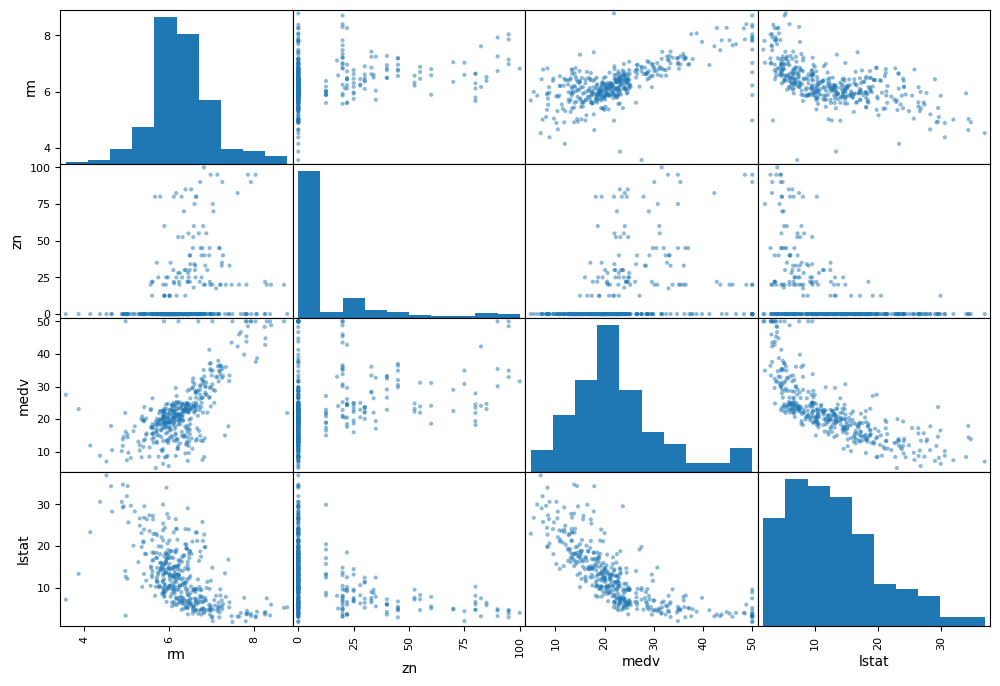

In [17]:
from pandas.plotting import scatter_matrix
attributes=["rm","zn","medv","lstat"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='rm', ylabel='medv'>

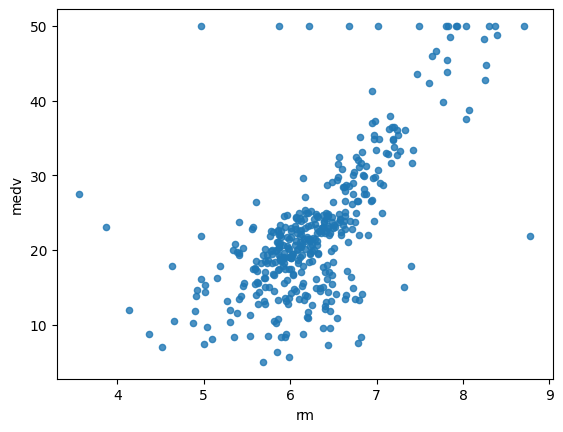

In [18]:
housing.plot(kind="scatter",x="rm",y="medv",alpha=0.8)

## combining attribute

In [19]:
housing["taxrm"]=housing['tax']/housing['rm']

In [20]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxrm
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


<Axes: xlabel='taxrm', ylabel='medv'>

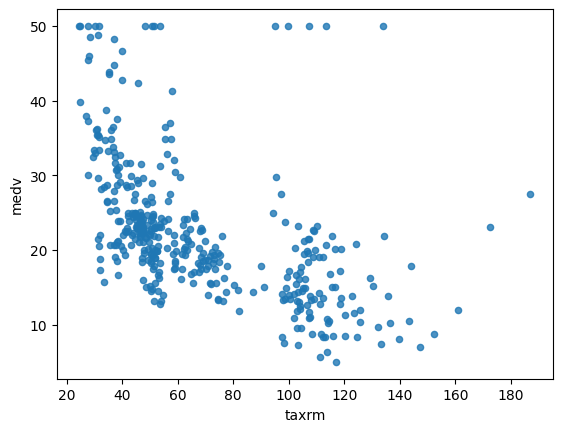

In [21]:
housing.plot(kind="scatter",x="taxrm",y="medv",alpha=0.8)

In [22]:
housing=strat_train_set.drop("medv",axis=1)
housing_labels=strat_train_set["medv"].copy()

## Missing Attribute


In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       401 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  b        404 non-null    float64
 12  lstat    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [24]:
a=housing.dropna(subset=["rm"]) #option droping all the rows which have missing attribute
a.shape

(401, 13)

In [25]:
median=housing['rm'].median()
housing['rm'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [28]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281238,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712229,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a pipeline


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
                     ('imputer',SimpleImputer(strategy="median")),
                    ('std_scalar',StandardScaler()),])

In [30]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [31]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [32]:
housing_num_tr.shape

(404, 13)

## selecting a desired model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=DecisionTreeRegressor()
#model=LinearRegression()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [34]:
some_data=housing.iloc[:5]

In [35]:
some_labels=housing_labels.iloc[:5]

In [36]:
prepared_data=my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([22.348, 25.626, 16.492, 23.333, 23.484])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)
mse

1.427429472772275

In [40]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_score=np.sqrt(-scores)
rmse_score

array([2.7893701 , 2.58883552, 4.37839989, 2.62306375, 3.31178847,
       2.66473341, 4.4884063 , 3.32255836, 3.39313459, 3.22542074])

In [41]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("std",scores.std())
    

In [42]:
print_scores(rmse_score)

scores: [2.7893701  2.58883552 4.37839989 2.62306375 3.31178847 2.66473341
 4.4884063  3.32255836 3.39313459 3.22542074]
mean: 3.278571112920641
std 0.6491418952311238


In [43]:
#from joblib import dump, load
#dump(model, 'BostonHousing.joblib') 
import pickle
pickle.dump(model,open('BostonHousing.pkl','wb'))

## Model Testing


In [44]:
X_test=strat_test_set.drop("medv",axis=1)
Y_test=strat_test_set["medv"].copy()

In [45]:
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

3.0062706703051956

In [46]:
print(final_predictions,list(Y_test))

[24.177 11.321 25.812 22.112 18.477 14.957 19.787 14.573 32.318 41.213
 20.05  11.697 25.282 27.275 19.76  10.907 31.447 14.285 23.598 18.276
 20.037 17.553 19.737 22.065 18.727 32.039 16.073 33.7    8.778 33.286
 23.358 21.319 23.139 10.99  21.311 11.328 42.646 24.572 23.407 42.277
 24.113 29.725 20.493 20.79  19.005 33.552 44.98  20.227 19.819 21.479
 21.079 14.395 21.116 14.635 24.547 33.355 42.221 29.402 19.614 20.887
 47.069 10.011 19.057 25.527 15.278 33.05  19.74  18.397 19.101 34.88
 26.259 23.218 21.764 22.847 34.537 12.487 15.855 19.959 20.849 21.309
 22.698 22.407 14.44  22.696 20.658 21.35  14.005 21.293 22.194 23.456
 18.759 26.881  7.27  26.779 19.15  30.075 19.762 31.342 14.832 26.525
 21.403 20.354] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [47]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24353455, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [48]:
pickled_model=pickle.load(open('BostonHousing.pkl','rb'))
pickled_model.predict(prepared_data[0].reshape(1,-1))

array([22.348])